# Image Classification using MNIST dataset with CNN

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
cnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
import matplotlib.pyplot as plt
import numpy as np

1 Trouser


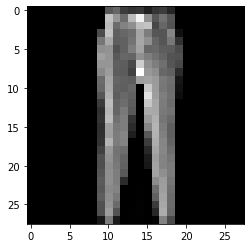

In [5]:
ind=16625
print(ytrain[ind],cnames[ytrain[ind]])
plt.imshow(xtrain[ind],cmap='gray')
plt.show()

## Data Preprocessing

In [6]:
# scale the images
xtrain = xtrain/255
xtest = xtest/255

In [7]:
# onehot encode the labels
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)


In [8]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [10]:
ytrain[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
# converting images into channel format - samples,rows,cols,channel
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Modelling the Convolutional Neural Network

<img src="https://miro.medium.com/max/2625/1*1TI1aGBZ4dybR6__DI9dzA.png">

In [13]:
from tensorflow.keras import models,layers

In [14]:
# input layer, we need to mention shape of imput data excluding the sample size
input_layer = layers.Input(shape=(28,28,1))

#################################################################################
# Feature Extraction Section
# first convolutional layer with 6 filters of size 3x3 each
c1 = layers.Conv2D(filters=6,kernel_size=(3,3),activation='relu')(input_layer)

# add a maxpooling layer
p1 = layers.MaxPooling2D()(c1)

# second convolutional layer with 16 filters of size 3x3 each
c2 = layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')(p1)

# add a maxpooling layer
p2 = layers.MaxPooling2D(pool_size=(2,2))(c2)

#####################################################################################
# using a flatten layer to convert the image from 2D array to 1D array -> 28x28 -->> 784x1
flatten = layers.Flatten()(p2)

# add the first hidden layer - for computaional layers  dense layer
h1 = layers.Dense(128,activation='relu')(flatten)

# add the next hidden layer
h2 = layers.Dense(84,activation='relu')(h1)

# add the output layer
output_layer = layers.Dense(10,activation='softmax')(h2)
model = models.Model(inputs=input_layer,outputs=output_layer)

In [64]:
# input layer, we need to mention shape of imput data excluding the sample size
input_layer = layers.Input(shape=(28,28,1))

#################################################################################
# Feature Extraction Section
# first convolutional layer with 10 filters of size 3x3 each
c1 = layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',padding='same')(input_layer)

# second convolutional layer with 30 filters of size 3x3 each
c2 = layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu')(c1)

# add a maxpooling layer
p1 = layers.MaxPooling2D()(c2)

# third conv layer
c3 = layers.Conv2D(filters=45,kernel_size=(3,3),activation='relu')(p1)

# fourth conv layer
c4 = layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu')(c3)

#####################################################################################
# using a flatten layer to convert the image from 2D array to 1D array -> 28x28 -->> 784x1
flatten = layers.Flatten()(c4)

# add the first hidden layer - for computaional layers  dense layer
h1 = layers.Dense(128,activation='relu')(flatten)

# add the next hidden layer
h2 = layers.Dense(84,activation='relu')(h1)

# add the output layer
output_layer = layers.Dense(10,activation='softmax')(h2)
model = models.Model(inputs=input_layer,outputs=output_layer)

In [65]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 30)        2730      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 45)        12195     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 60)          24360     
_________________________________________________________________
flatten_5 (Flatten)          (None, 4860)              0   

In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=2000,shuffle=True,validation_data=(xtest,ytest),verbose=True)

Epoch 1/10
30/30 [==============================] - 3s 51ms/step - loss: 0.3366 - accuracy: 0.8803 - val_loss: 0.2945 - val_accuracy: 0.8936
Epoch 2/10
30/30 [==============================] - 1s 47ms/step - loss: 0.2428 - accuracy: 0.9110 - val_loss: 0.2725 - val_accuracy: 0.9005
Epoch 3/10
30/30 [==============================] - 1s 49ms/step - loss: 0.2284 - accuracy: 0.9153 - val_loss: 0.2709 - val_accuracy: 0.9008
Epoch 4/10
30/30 [==============================] - 1s 47ms/step - loss: 0.2190 - accuracy: 0.9195 - val_loss: 0.2629 - val_accuracy: 0.9047
Epoch 5/10
30/30 [==============================] - 1s 47ms/step - loss: 0.2120 - accuracy: 0.9215 - val_loss: 0.2604 - val_accuracy: 0.9044
Epoch 6/10
30/30 [==============================] - 1s 47ms/step - loss: 0.2041 - accuracy: 0.9251 - val_loss: 0.2634 - val_accuracy: 0.9036
Epoch 7/10
30/30 [==============================] - 1s 47ms/step - loss: 0.1969 - accuracy: 0.9273 - val_loss: 0.2523 - val_accuracy: 0.9093
Epoch 8/10
30

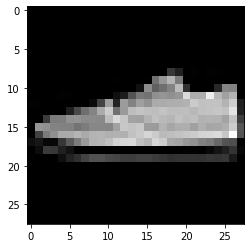

In [18]:
plt.imshow(xtest[60].reshape(28,28),cmap='gray')
plt.show()

In [19]:
xtest[56].shape

(28, 28, 1)

In [20]:
prediction = model.predict(xtest[60].reshape(1,28,28))
print(prediction)

pred = np.argmax(prediction)
print(pred,cnames[pred])

[[1.8485678e-05 1.3526434e-07 6.9596526e-06 1.4835942e-06 4.4121155e-08
  1.6132456e-03 4.4926387e-07 9.9742317e-01 3.9975625e-04 5.3622545e-04]]
7 Sneaker


In [39]:
ypred = model.predict(xtest)
ypred = [np.argmax(i) for i in ypred]
ytest2 = [np.argmax(i) for i in ytest]

from sklearn import metrics
print(metrics.classification_report(ytest2,ypred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.97      0.99      0.98      1000
           2       0.84      0.83      0.84      1000
           3       0.92      0.86      0.89      1000
           4       0.79      0.88      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.67      0.70      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [40]:
import pandas as pd
pd.DataFrame(metrics.confusion_matrix(ytest2,ypred),columns=cnames,index=cnames)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,863,1,21,20,7,1,78,0,9,0
Trouser,0,986,0,6,3,0,5,0,0,0
Pullover,16,0,835,7,80,0,62,0,0,0
Dress,12,23,14,862,56,0,31,0,1,1
Coat,0,1,39,14,884,0,62,0,0,0
Sandal,0,0,0,1,0,979,0,13,0,7
Shirt,134,4,72,19,91,0,673,0,7,0
Sneaker,0,0,0,0,0,10,0,974,0,16
Bag,2,1,8,4,5,2,2,3,972,1
Ankle boot,0,0,0,0,0,6,0,41,0,953


## Exploring a trained CNN

In [42]:
model2 = models.Model(inputs=input_layer,outputs=c1)
model2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 10)        100       
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [44]:
len(model.weights)

14

In [45]:
model.weights[0].shape

TensorShape([3, 3, 1, 10])

In [55]:
filters_c1 = model.weights[0].numpy()

In [54]:
type(filters_c1.numpy())

numpy.ndarray

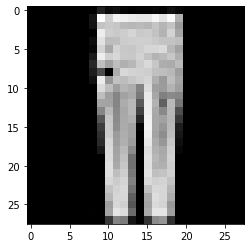

In [61]:
plt.imshow(xtest[200].reshape(28,28),cmap='gray')

In [62]:
fmap = model2.predict(xtest[200].reshape(1,28,28,1))
fmap.shape

(1, 26, 26, 10)

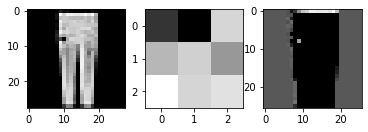

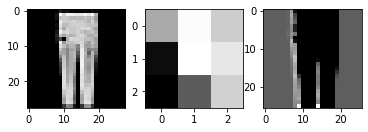

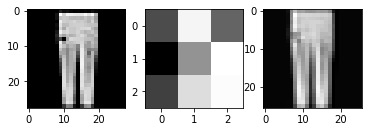

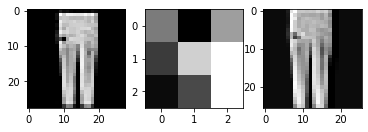

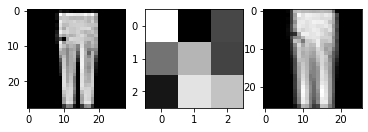

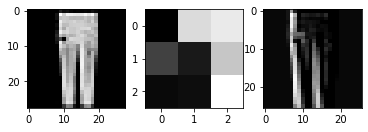

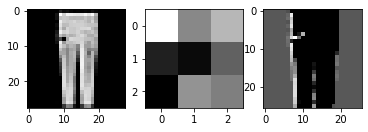

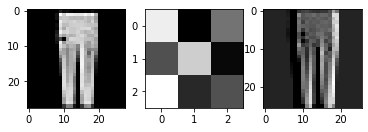

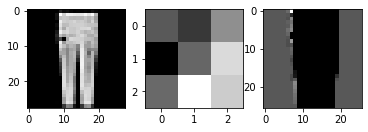

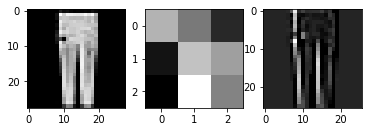

In [63]:
for i in range(10):
  plt.subplot(131)
  plt.imshow(xtest[200].reshape(28,28),cmap='gray')
  plt.subplot(132)
  plt.imshow(filters_c1[:,:,:,i].reshape(3,3),cmap='gray')
  plt.subplot(133)
  plt.imshow(fmap[:,:,:,i].reshape(26,26),cmap='gray')
  plt.show()